In [8]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense, Flatten, Conv2D, MaxPooling2D, BatchNormalization, Dropout, LeakyReLU 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model


In [9]:
# Image dimensions
image_dimensions = {'height': 256, 'width': 256, 'channels': 3}

# Classifier class
class Classifier:
    def __init__(self):
        self.model = 0

    def predict(self, x):
        return self.model.predict(x)

    def fit(self, x, y):
        return self.model.train_on_batch(x, y)

    def get_accuracy(self, x, y):
        return self.model.test_on_batch(x, y)

    def load(self, path):
        self.model.load_weights(path)



In [10]:

# Meso4 class
class Meso4(Classifier):
    def __init__(self, learning_rate=0.001):
        self.model = self.init_model()
        optimizer = Adam(lr=learning_rate)
        self.model.compile(optimizer=optimizer,
                           loss='mean_squared_error',
                           metrics=['accuracy'])
        
    def init_model(self):
        x = Input(shape=(image_dimensions['height'],
                         image_dimensions['width'],
                         image_dimensions['channels']))
        x1 = Conv2D(8, (3,3), padding = 'same', activation = 'relu')(x)
        x1 = BatchNormalization()(x1)
        x1 = MaxPooling2D(pool_size= (2, 2), padding = 'same')(x1)
        
        x2 = Conv2D(8, (5,5), padding = 'same', activation = 'relu')(x1)
        x2= BatchNormalization()(x2)
        x2= MaxPooling2D(pool_size= (2, 2), padding = 'same')(x2)
        
        
        x3= Conv2D(16, (5,5), padding = 'same', activation = 'relu')(x2)
        x3= BatchNormalization()(x3)
        x3= MaxPooling2D(pool_size= (2, 2), padding = 'same')(x3)
        
        x4= Conv2D(16 , (5,5), padding = 'same', activation = 'relu')(x3)
        x4= BatchNormalization()(x4)
        x4= MaxPooling2D(pool_size= (4, 4), padding = 'same')(x4)
        
        y = Flatten()(x4)
        y = Dropout(0.5)(y)
        y = Dense(16)(y)
        y = LeakyReLU(alpha=0.1)(y)
        y = Dropout(0.5)(y)
        y = Dense(1, activation = 'sigmoid')(y)
        
        
        return Model(inputs=x, outputs =y)


In [11]:

# Instantiate MesoNet with pretrained weights
meso = Meso4()
meso.load('Meso4_DF')

# Freeze the weights of the pretrained layers
for layer in meso.model.layers:
    layer.trainable = False


In [12]:

# Compile the model after freezing the weights
meso.model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [13]:
# Prepare image data
dataGenerator = ImageDataGenerator(rescale=1./255)

# Generators for train, validation, and test sets
generator = dataGenerator.flow_from_directory('archive/data/train', target_size=(256, 256), batch_size=32, class_mode='binary')
generator0 = dataGenerator.flow_from_directory('archive/data/val', target_size=(256, 256), batch_size=32, class_mode='binary')
generator1 = dataGenerator.flow_from_directory('archive/data/test', target_size=(256, 256), batch_size=32, class_mode='binary')


Found 11448 images belonging to 2 classes.
Found 1257 images belonging to 2 classes.
Found 3103 images belonging to 2 classes.


In [14]:
# Training the model
history = meso.model.fit(generator, epochs=30, validation_data=generator0)
# Save the trained model
meso.model.save('meso_model3.h5')

Epoch 1/30
358/358 [==============================] - 114s 314ms/step - loss: 0.9248 - accuracy: 0.6361 - val_loss: 1.0224 - val_accuracy: 0.5879
Epoch 2/30
358/358 [==============================] - 89s 248ms/step - loss: 0.9291 - accuracy: 0.6395 - val_loss: 1.0224 - val_accuracy: 0.5879
Epoch 3/30
358/358 [==============================] - 91s 253ms/step - loss: 0.9323 - accuracy: 0.6350 - val_loss: 1.0224 - val_accuracy: 0.5879
Epoch 4/30
358/358 [==============================] - 92s 256ms/step - loss: 0.9306 - accuracy: 0.6350 - val_loss: 1.0224 - val_accuracy: 0.5879
Epoch 5/30
358/358 [==============================] - 92s 258ms/step - loss: 0.9198 - accuracy: 0.6327 - val_loss: 1.0224 - val_accuracy: 0.5879
Epoch 6/30
358/358 [==============================] - 95s 264ms/step - loss: 0.9260 - accuracy: 0.6373 - val_loss: 1.0224 - val_accuracy: 0.5879
Epoch 7/30
358/358 [==============================] - 98s 273ms/step - loss: 0.9336 - accuracy: 0.6372 - val_loss: 1.0224 - val_a

In [15]:
# Unfreeze some or all of the pretrained layers for fine-tuning
for layer in meso.model.layers:
    layer.trainable = True

# Recompile the model after unfreezing
meso.model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Fine-tune the model
history_finetune = meso.model.fit(generator, epochs=15, validation_data=generator0)

# Save the trained model
meso.model.save('meso_modelPT5.h5')

Epoch 1/15
358/358 [==============================] - 370s 1s/step - loss: 0.4513 - accuracy: 0.7850 - val_loss: 1.4671 - val_accuracy: 0.5577
Epoch 2/15
358/358 [==============================] - 376s 1s/step - loss: 0.2831 - accuracy: 0.8735 - val_loss: 0.7555 - val_accuracy: 0.7303
Epoch 3/15
358/358 [==============================] - 367s 1s/step - loss: 0.2095 - accuracy: 0.9102 - val_loss: 0.2687 - val_accuracy: 0.8854
Epoch 4/15
358/358 [==============================] - 376s 1s/step - loss: 0.1292 - accuracy: 0.9518 - val_loss: 0.8493 - val_accuracy: 0.7621
Epoch 5/15
358/358 [==============================] - 370s 1s/step - loss: 0.0867 - accuracy: 0.9701 - val_loss: 17.4346 - val_accuracy: 0.4996
Epoch 6/15
358/358 [==============================] - 369s 1s/step - loss: 0.0599 - accuracy: 0.9818 - val_loss: 0.0509 - val_accuracy: 0.9737
Epoch 7/15
358/358 [==============================] - 367s 1s/step - loss: 0.0459 - accuracy: 0.9854 - val_loss: 0.2251 - val_accuracy: 0.907

Final Accuracy on Test Set: 0.9688


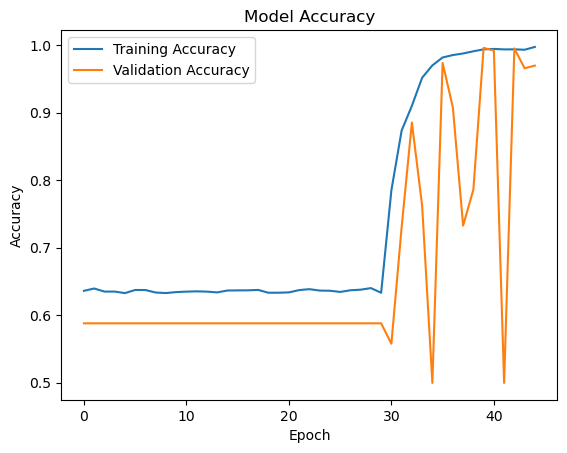

In [16]:
# Print final accuracy on the test set
final_accuracy = meso.get_accuracy(generator1[0][0], generator1[0][1])
print(f"Final Accuracy on Test Set: {final_accuracy[1]:.4f}")

# Plot accuracy during training and fine-tuning
plt.plot(history.history['accuracy'] + history_finetune.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'] + history_finetune.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()  
 

1/1 [==============================] - 0s 168ms/step
Predicted likelihood: 0.1879
Actual label: 0
Correct prediction: True


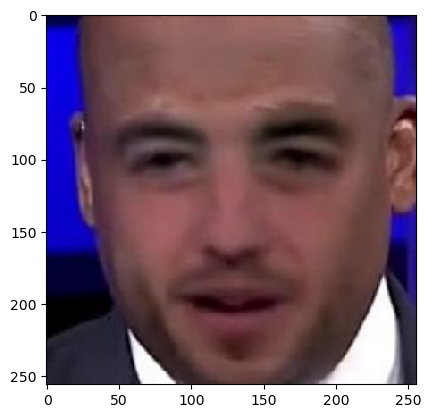

In [17]:
# Rendering image X with label y for MesoNet
X_batch, y_batch = generator.next()

# Take the first image from the batch
X = X_batch[0]
y = y_batch[0]

# Ensure the input shape matches the expected shape of the model
X = X[np.newaxis, ...]

# Evaluating prediction
predicted_likelihood = meso.predict(X)[0][0]
actual_label = int(y)
correct_prediction = round(predicted_likelihood) == actual_label

# Print results
print(f"Predicted likelihood: {predicted_likelihood:.4f}")
print(f"Actual label: {actual_label}")
print(f"Correct prediction: {correct_prediction}")

# Display the image
plt.imshow(np.squeeze(X_batch[0]))
plt.show()
